In [ ]:
print("Init")

Init


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset: PRDECT-ID
PATH = "PRDECT-ID Dataset.csv"
datasets = pd.read_csv(PATH)
datasets.head()
datasets = datasets.drop_duplicates()

In [ ]:
column = ['Customer Review', 'Sentiment', 'Emotion']
dataset = datasets[column]
dataset.head()

,Customer Review,Sentiment,Emotion
0,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [ ]:
def clean_review(text):
    if isinstance(text, str):
        text = text.lower()  # Case folding
        text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Special Characters
        return text
    return text

In [ ]:
dataset["Customer Review"] = dataset["Customer Review"].apply(clean_review)
dataset[["Customer Review"]].head()

<ipython-input-6-db4a1fb7f8ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Customer Review"] = dataset["Customer Review"].apply(clean_review)


,Customer Review
0,alhamdulillah berfungsi dengan baik packaging ...
1,barang bagus dan respon cepat harga bersaing d...
2,barang bagus berfungsi dengan baik seler ramah...
3,bagus sesuai harapan penjual nya juga ramah tr...
4,barang bagus pengemasan aman dapat berfungsi d...


In [ ]:
# Sentiment= [ Positive: 1, Negative: 0]
dataset['Sentiment'] = dataset['Sentiment'].map({'Positive': 1, 'Negative': 0})

<ipython-input-7-b45be2a6c363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment'] = dataset['Sentiment'].map({'Positive': 1, 'Negative': 0})


- Happy: 4
- Love: 3  
- Fear: 2
- Anger: 1
- Sadness: 0  

In [ ]:
dataset["Emotion"].value_counts()

,count
Emotion,
Happy,1768
Sadness,1201
Fear,918
Love,808
Anger,698


In [ ]:
dataset['Emotion'] = dataset['Emotion'].map({'Happy': 4,'Love': 3, 'Fear': 2, 'Anger': 1, 'Sadness': 0 })

<ipython-input-9-395ba039dfbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Emotion'] = dataset['Emotion'].map({'Happy': 4,'Love': 3, 'Fear': 2, 'Anger': 1, 'Sadness': 0 })


In [ ]:
dataset["Emotion"].value_counts()

,count
Emotion,
4,1768
0,1201
2,918
3,808
1,698


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset["Customer Review"])
y = dataset[["Sentiment","Emotion"]]

<ipython-input-13-6e67b09aed99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=dataset, palette="viridis").set_xticklabels(["Sadness", "Anger", "Fear", "Love", "Happy"])
<ipython-input-13-6e67b09aed99>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(x="Emotion", data=dataset, palette="viridis").set_xticklabels(["Sadness", "Anger", "Fear", "Love", "Happy"])


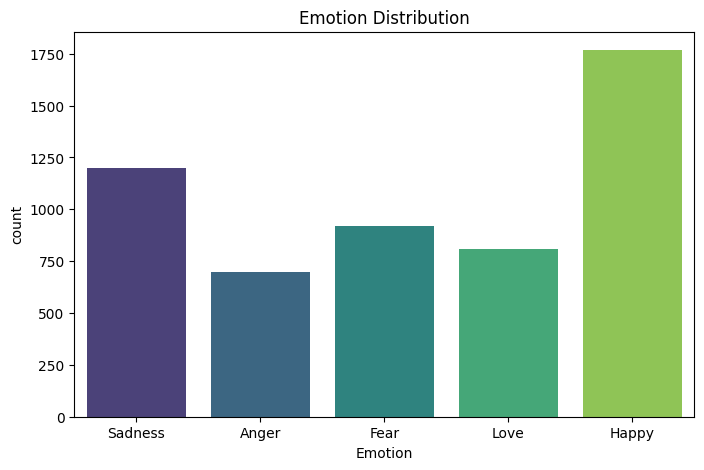

In [ ]:
plt.figure(figsize=(8, 5))
#01234
sns.countplot(x="Emotion", data=dataset, palette="viridis").set_xticklabels(["Sadness", "Anger", "Fear", "Love", "Happy"])

plt.xticks(rotation=0)
plt.title("Emotion Distribution")
plt.show()

<ipython-input-14-4c717376ae4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=datasets, palette="viridis")


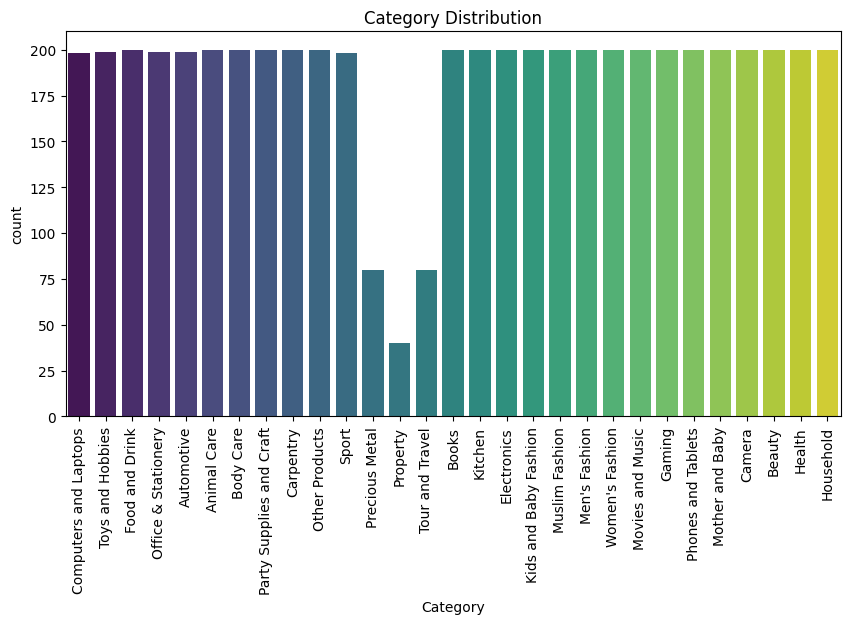

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Category", data=datasets, palette="viridis")
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

<ipython-input-15-b5c0d9b6d512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Sentiment"] = dataset["Sentiment"].astype("category").cat.codes
<ipython-input-15-b5c0d9b6d512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Emotion"] = dataset["Emotion"].astype("category").cat.codes
<ipython-input-15-b5c0d9b6d512>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

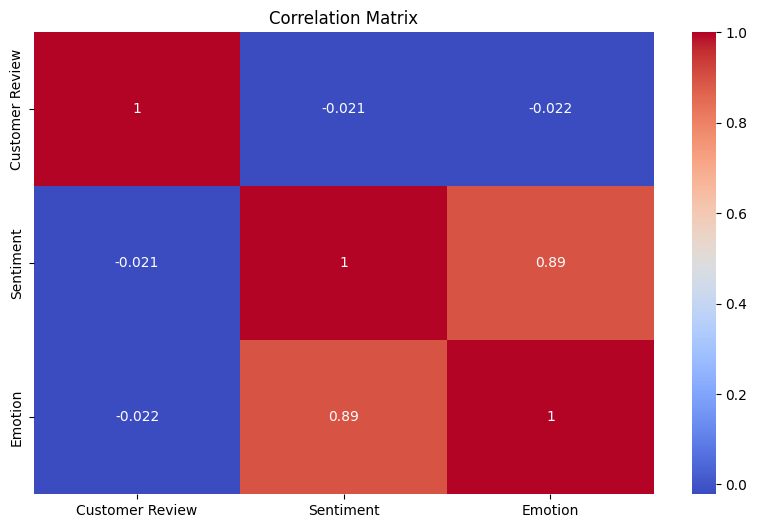

In [ ]:
dataset["Sentiment"] = dataset["Sentiment"].astype("category").cat.codes
dataset["Emotion"] = dataset["Emotion"].astype("category").cat.codes
dataset["Customer Review"] = dataset["Customer Review"].astype("category").cat.codes

plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
